In [1]:
import numpy as np


#加载数据
def load_data():
    with open('简单分类数据.txt') as fr:
        lines = fr.readlines()

    x = np.empty((len(lines), 2), dtype=float)
    y = np.empty(len(lines), dtype=int)

    for i in range(len(lines)):
        line = lines[i].strip().split('\t')
        x[i] = line[:2]
        y[i] = line[2]

    #以y区分两类x
    x0 = x[y == -1]
    x1 = x[y == 1]

    return x0, x1


x0, x1 = load_data()
x0[:5], x1[:5]

(array([[-0.017612, 14.053064],
        [-0.752157,  6.53862 ],
        [-1.322371,  7.152853],
        [ 0.423363, 11.054677],
        [ 0.667394, 12.741452]]),
 array([[-1.395634,  4.662541],
        [ 0.406704,  7.067335],
        [-2.46015 ,  6.866805],
        [ 0.850433,  6.920334],
        [ 1.176813,  3.16702 ]]))

In [2]:
#求向量均值
mu0 = x0.mean(axis=0)
mu1 = x1.mean(axis=0)
mu0, mu1

(array([ 0.08204613, 10.65488423]), array([-0.01613109,  2.95908379]))

In [3]:
#求协方差矩阵
sigma0 = np.cov(x0, rowvar=False)
sigma1 = np.cov(x1, rowvar=False)
sigma0, sigma1

(array([[0.9579532 , 0.54249108],
        [0.54249108, 3.70851954]]),
 array([[1.75563826, 2.04944407],
        [2.04944407, 9.42458334]]))

In [4]:
#按照书上的思路,定义sw和sb
sw = sigma0 + sigma1
sb = np.outer(mu0 - mu1, mu0 - mu1)

sw, sb

(array([[ 2.71359145,  2.59193514],
        [ 2.59193514, 13.13310288]]),
 array([[9.63876692e-03, 7.55552308e-01],
        [7.55552308e-01, 5.92253444e+01]]))

In [5]:
#求sw的逆矩阵
#奇异值分解
u, sigma, v = np.linalg.svd(sw, full_matrices=False)

#求逆矩阵
sw_I = np.matmul(v.T / sigma, u.T)

#两者等价，但是使用奇异值分解的方式可以保证数值的稳定性
sw_I, np.linalg.inv(sw)

(array([[ 0.45412231, -0.08962509],
        [-0.08962509,  0.09383178]]),
 array([[ 0.45412231, -0.08962509],
        [-0.08962509,  0.09383178]]))

In [6]:
#约束:w * sw * w.T = 1
#求最大:w * sb * w.T
#w = sw.I * (mu0 - mu1)
w = sw_I.dot(mu0 - mu1)
w

array([-0.64515237,  0.71331152])

In [7]:
#投影
#(N,2) * (2,1) = (N,1)
p0 = x0.dot(w)
p1 = x1.dot(w)

p0[:5], p1[:5]

(array([10.03557485,  5.14932884,  5.95534323,  7.61229479,  8.65805365]),
 array([4.22624079, 4.77882541, 6.48534272, 4.38769508, 1.49984814]))

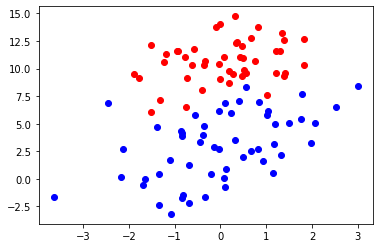

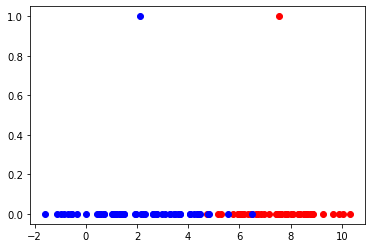

In [8]:
import matplotlib.pyplot as plt


def draw():
    plt.scatter(x0[:, 0], x0[:, 1], c='red')
    plt.scatter(x1[:, 0], x1[:, 1], c='blue')

    plt.show()

    plt.scatter(p0, np.zeros(len(p0)), c='red')
    plt.scatter(p1, np.zeros(len(p1)), c='blue')

    plt.scatter(p0.mean(), 1, c='red')
    plt.scatter(p1.mean(), 1, c='blue')

    plt.show()


draw()

In [9]:
#预测函数
def predict(p):
    d0 = np.power(p - p0.mean(), 2)
    d1 = np.power(p - p1.mean(), 2)
    pred = 1 if d0 > d1 else -1
    return pred


predict(p0[0])

-1

In [10]:
#测试
correct = 0
for i in p0:
    if predict(i) == -1:
        correct += 1

for i in p1:
    if predict(i) == 1:
        correct += 1

correct / (len(p0) + len(p1))

0.97